(3, 3) [[17.333334 17.333334 17.333334]
 [17.333334 17.333334 17.333334]
 [17.333334 17.333334 17.333334]]


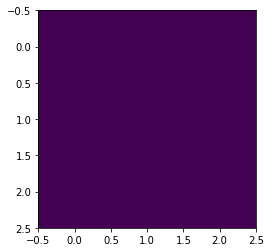

In [1]:
%matplotlib inline

import numpy as np
from scipy.signal import convolve2d
from matplotlib import pyplot as plt

arr = np.arange(5*5).reshape((5,5)).astype(np.float32)
n = 3

def mean_conv(arr, n):
    k_mean = np.ones((n,n), dtype=np.float32)/(n**2)
    return convolve2d(arr, k_mean, mode='valid')

def var_conv(arr, n):
    k_sum = np.ones((n,n), dtype=np.float32)
    return (convolve2d(np.square(arr), k_sum, mode='valid') - np.square(convolve2d(arr, k_sum, mode='valid'))/(n**2))/(n**2)

out = var_conv(arr, n)
print(out.shape, out)
plt.imshow(out)

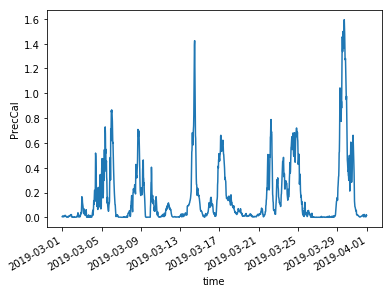

In [9]:
import xarray as xr

dsy = xr.open_dataset("/data/GPM_HIM8/GPM_201903.nc")

dsy.PrecCal.mean(dim=["x","y"]).plot()

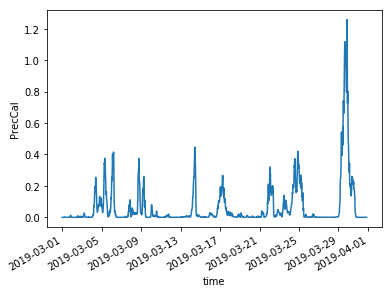

In [12]:
dsyh = xr.open_dataset("model_2months_150epochs_conv5_alpha2_beta4_201903.nc")

dsyh.PrecCal.mean(dim=["x","y"]).plot()

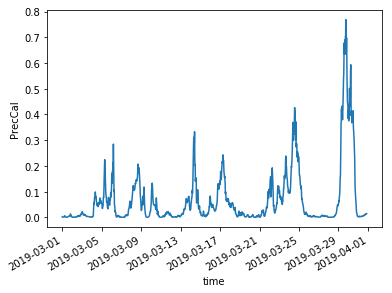

In [13]:
dsyh = xr.open_dataset("model_2months_150epochs_mse_201903.nc")

dsyh.PrecCal.mean(dim=["x","y"]).plot()

(128, 128)


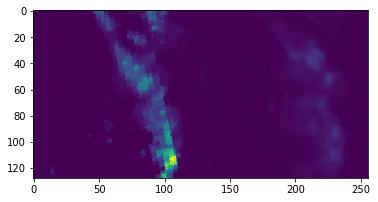

In [22]:
dsy = xr.open_dataset("/data/GPM_HIM8/GPM_201903.nc")
arr_y = dsy.PrecCal.sel(time="2019-03-29T12:00:00").values

dsyh = xr.open_dataset("model_2months_150epochs_mse_201903.nc")
arr_yh = dsyh.PrecCal.sel(time="2019-03-29T12:00:00").values

print(arr.shape)
#out = var_conv(arr, n)
#print(out.shape, out)
plt.imshow(np.hstack((arr_y,arr_yh)))

(128, 128)


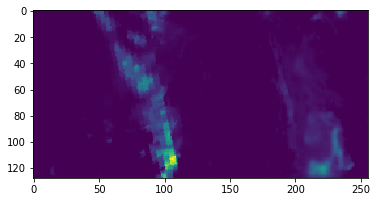

In [21]:
dsy = xr.open_dataset("/data/GPM_HIM8/GPM_201903.nc")
arr_y = dsy.PrecCal.sel(time="2019-03-29T12:00:00").values

dsyh = xr.open_dataset("model_2months_150epochs_conv5_alpha2_beta4_201903.nc")
arr_yh = dsyh.PrecCal.sel(time="2019-03-29T12:00:00").values

print(arr.shape)
#out = var_conv(arr, n)
#print(out.shape, out)
plt.imshow(np.hstack((arr_y,arr_yh)))

In [ ]:
dsy = xr.open_dataset("/data/GPM_HIM8/GPM_201903.nc")
arr_y = dsy.PrecCal.sel(time="2019-03-29T12:00:00").values

dsyh = xr.open_dataset("model_2months_150epochs_mse_201903.nc")
arr_yh = dsyh.PrecCal.sel(time="2019-03-29T12:00:00").values

print(arr.shape)
#out = var_conv(arr, n)
#print(out.shape, out)
plt.imshow(np.hstack((arr_y,arr_yh)))

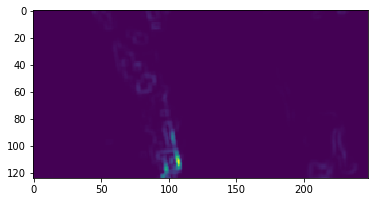

In [24]:
dsy = xr.open_dataset("/data/GPM_HIM8/GPM_201903.nc")
arr_y = dsy.PrecCal.sel(time="2019-03-29T12:00:00").values

#dsyh = xr.open_dataset("model_2months_150epochs_mse_201903.nc")
dsyh = xr.open_dataset("model_2months_150epochs_conv5_alpha2_beta4_201903.nc")
arr_yh = dsyh.PrecCal.sel(time="2019-03-29T12:00:00").values

var_y = var_conv(arr_y, 5)
var_yh = var_conv(arr_yh, 5)

plt.imshow(np.hstack((var_y,var_yh)))

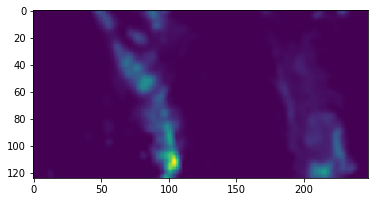

In [26]:
dsy = xr.open_dataset("/data/GPM_HIM8/GPM_201903.nc")
arr_y = dsy.PrecCal.sel(time="2019-03-29T12:00:00").values

#dsyh = xr.open_dataset("model_2months_150epochs_mse_201903.nc")
dsyh = xr.open_dataset("model_2months_150epochs_conv5_alpha2_beta4_201903.nc")
arr_yh = dsyh.PrecCal.sel(time="2019-03-29T12:00:00").values

mean_y = mean_conv(arr_y, 5)
mean_yh = mean_conv(arr_yh, 5)

plt.imshow(np.hstack((mean_y,mean_yh)))